In [2]:
import argparse
from synthesizer.grid import Grid
from synthesizer.sed import Sed
import numpy as np
import matplotlib.pyplot as plt

In [3]:

grid_name = 'bpass-2.2.1-bin_bpl-0.1,1.0,300.0-1.3,2.35_cloudy-c17.03'
grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids/'
grid = Grid(grid_name, grid_dir=grid_dir, read_lines = True)

In [4]:
grid_point = grid.get_grid_point((6.5, 0.01))

In [5]:
sed = grid.get_sed(grid_point, spec_name='linecont')

/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


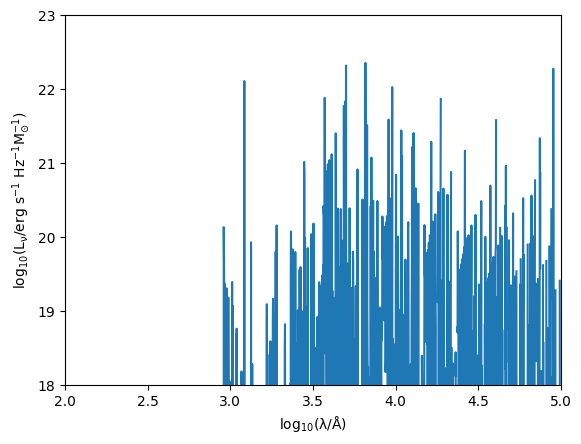

In [6]:


plt.plot(np.log10(sed.lam), np.log10(sed.lnu))
plt.xlim([2.0, 5.0])
plt.ylim([18.0, 23])
plt.xlabel(r"$\rm log_{10}(\lambda/\AA)$")
plt.ylabel(r"$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1} M_{\odot}^{-1})$")
plt.show()

In [7]:
print(grid.line_list)

['AL 2 2660.35A', 'AR 3 7135.79A', 'AR 3 7751.11A', 'C 2 1037.02A', 'C 2 2325.40A', 'C 2 2326.93A', 'C 3 1906.68A', 'C 3 1908.73A', 'CA 2 7291.47A', 'CL 3 5517.71A', 'FE 2 2382.04A', 'FE 2 2625.67A', 'FE 3 4658.01A', 'FE 3 4701.62A', 'FE 3 4881.12A', 'FE 3 5270.40A', 'FE 4 2567.61A', 'FE 4 2829.36A', 'FE 4 2835.74A', 'FE 4 3094.96A', 'H 1 1.00521m', 'H 1 1.09410m', 'H 1 1.28215m', 'H 1 1.81790m', 'H 1 1.87561m', 'H 1 1.94507m', 'H 1 1215.67A', 'H 1 2.16611m', 'H 1 2.62585m', 'H 1 3836.47A', 'H 1 3890.15A', 'H 1 3971.19A', 'H 1 4.05224m', 'H 1 4102.89A', 'H 1 4341.68A', 'H 1 4862.69A', 'H 1 6564.62A', 'H 1 9231.50A', 'H 1 9548.54A', 'MG 2 2795.53A', 'MG 2 2802.71A', 'N 2 6548.05A', 'N 2 6583.45A', 'N 3 991.511A', 'NE 3 3868.76A', 'NE 3 3967.47A', 'O 1 6300.30A', 'O 2 2470.34A', 'O 2 3726.03A', 'O 2 3728.81A', 'O 3 1666.15A', 'O 3 4363.21A', 'O 3 4958.91A', 'O 3 5006.84A', 'S 2 6716.44A', 'S 2 6730.82A', 'S 3 6312.06A', 'S 3 9068.62A', 'S 3 9530.62A', 'SI 2 1179.59A', 'SI 2 1194.50A', 'S

In [8]:
from unyt import c, erg, s, Hz


lnu = (np.zeros(len(sed.lam))+1) * erg/s/Hz




lc = grid.get_lines_info(grid_point)

for line in lc:
    idx = (np.abs(sed.lam-line.wavelength)).argmin()
    dl = 0.5*(sed.lam[idx+1] - sed.lam[idx-1])
    n = c / line.wavelength
    llnu = line.wavelength*(line.luminosity/n)/dl
    print(line.id, llnu)
    lnu[idx] += llnu.to('erg/s/Hz')

linecont = Sed(lam=sed.lam, lnu=lnu)

AL 2 2660.35A 3.4171604968662626e+19 erg
AR 3 7135.79A 1.2160369130315946e+21 erg
AR 3 7751.11A 3.142181892323188e+20 erg
C 2 1037.02A 1.82737743318288e+19 erg
C 2 2325.40A 5.942662523607778e+19 erg
C 2 2326.93A 3.775816620210624e+19 erg
C 3 1906.68A 8.120400086293735e+19 erg
C 3 1908.73A 5.419001155430024e+19 erg
CA 2 7291.47A 1.1423764789381687e+20 erg
CL 3 5517.71A 6.352778899730821e+19 erg
FE 2 2382.04A 7.088114329158406e+19 erg
FE 2 2625.67A 9.246899179233501e+19 erg
FE 3 4658.01A 2.3295098555381875e+20 erg
FE 3 4701.62A 7.659182558723069e+19 erg
FE 3 4881.12A 5.498158863645978e+19 erg
FE 3 5270.40A 2.153271199504039e+20 erg
FE 4 2567.61A 8.87400217015899e+18 erg
FE 4 2829.36A 4.9423487519374e+19 erg
FE 4 2835.74A 9.479213973955985e+19 erg
FE 4 3094.96A 1.1131835170124633e+20 erg
H 1 1.00521m 7.311903206493196e+20 erg
H 1 1.09410m 1.2841464302399332e+21 erg
H 1 1.28215m 2.6978488689306564e+21 erg
H 1 1.81790m 3.0253290076234816e+20 erg
H 1 1.87561m 7.878213082647087e+21 erg
H 1 1.

In [9]:
print(np.max(linecont.lnu))
print(np.max(sed.lnu))

2.364879641790639e+22 erg/(Hz*s)
1.841040337120533e+24 erg/(Hz*s)


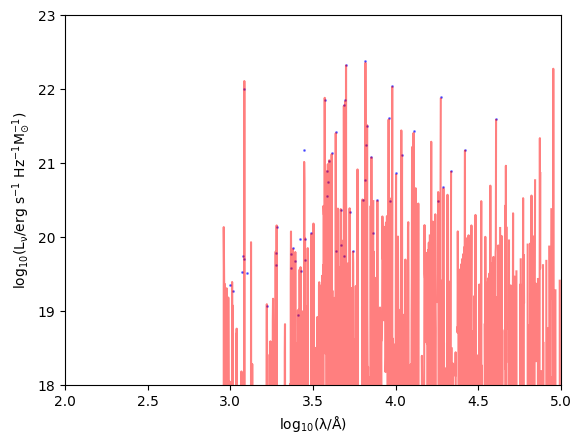

In [10]:
plt.plot(np.log10(sed.lam), np.log10(sed.lnu), alpha=0.5, c='r')
# plt.plot(np.log10(linecont.lam), np.log10(linecont.lnu), alpha=0.5, c='b')
plt.scatter(np.log10(linecont.lam), np.log10(linecont.lnu), alpha=0.5, color='b',s=1)
plt.xlim([2.0, 5.0])
plt.ylim([18.0, 23])
plt.xlabel(r"$\rm log_{10}(\lambda/\AA)$")
plt.ylabel(r"$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1} M_{\odot}^{-1})$")
plt.show()

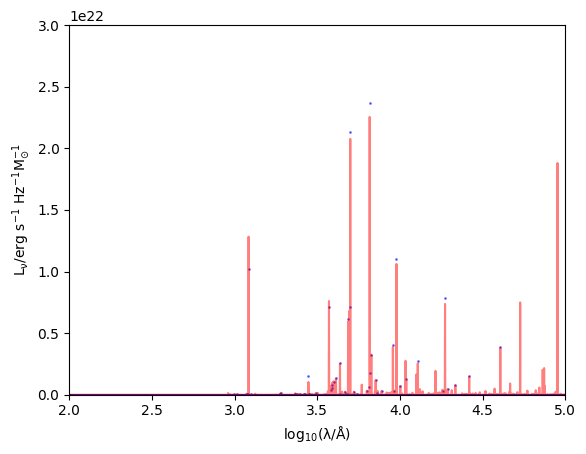

In [15]:
plt.plot(np.log10(sed.lam), sed.lnu, alpha=0.5, c='r')
# plt.plot(np.log10(linecont.lam), np.log10(linecont.lnu), alpha=0.5, c='b')
plt.scatter(np.log10(linecont.lam), linecont.lnu, alpha=0.5, color='b',s=1)
plt.xlim([2.0, 5.0])
plt.ylim([0, 0.3E23])
plt.xlabel(r"$\rm log_{10}(\lambda/\AA)$")
plt.ylabel(r"$\rm L_{\nu}/erg\ s^{-1}\ Hz^{-1} M_{\odot}^{-1}$")
plt.show()